In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\ProgramData\anaconda3\envs\python_code\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df[['job_title_short','job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [4]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

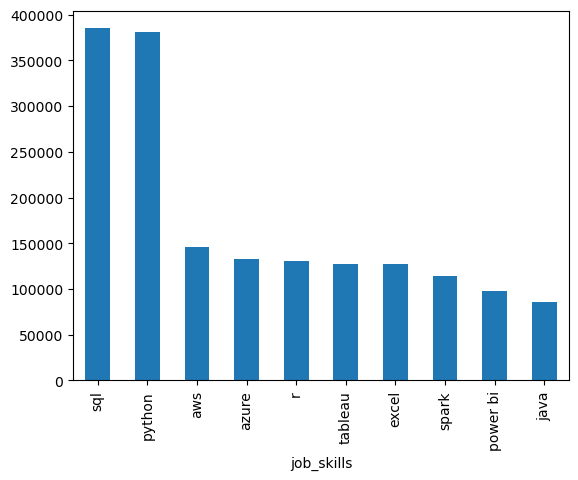

In [6]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [ ]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

type(skills_count)

pandas.core.series.Series

In [14]:
df_skills_count = skills_count.reset_index(name='Skill_count')

df_skills_count = df_skills_count.sort_values(by='Skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,Skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


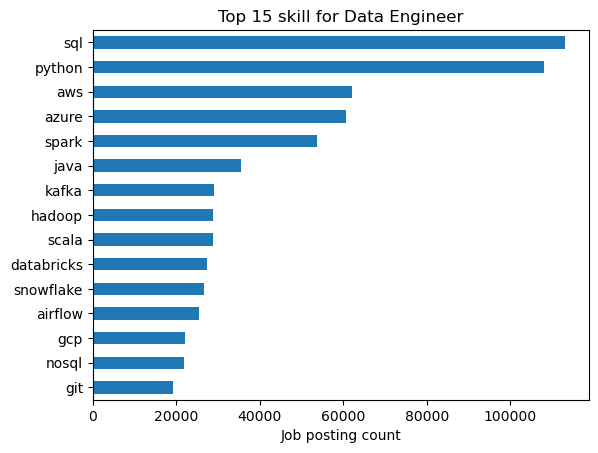

In [22]:
job_title = 'Data Engineer'
top_skills = 15

df_final_skills = df_skills_count[df_skills_count['job_title_short']== job_title].head(top_skills)

df_final_skills.plot(kind='barh', x='job_skills', y='Skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skill for {job_title}')
plt.xlabel('Job posting count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()